## Principal component analysis (PCA) - with SVD (single value decomposition)

"Take the whole dataset consisting of d-dimensional samples ignoring the class labels

Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset)

Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set

Compute eigenvectors (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd)

Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix WW(where every column represents an eigenvector)

Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: yy=WWT×xx (where xx is a d×1-dimensional vector representing one sample, and yy is the transformed k×1-dimensional sample in the new subspace.)"

To follow along
https://www.youtube.com/watch?v=FgakZw6K1QQ

http://www.miketipping.com/papers/met-mppca.pdf

In [24]:
import numpy as np
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]

from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)
print("variance_ratio",pca.explained_variance_ratio_)
print(pca.explained_variance_) 



# As we can see, only the 2 first components are useful
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

-inf
variance_ratio [7.10435531e-01 2.89564469e-01 7.50983894e-33]
[2.93433650e+00 1.19599816e+00 3.10181481e-32]


(100, 2)

In [10]:
from matplotlib import pyplot as plt 


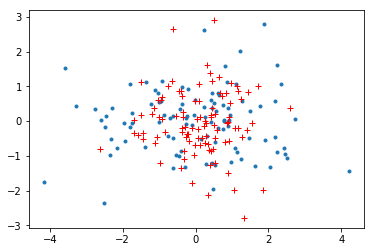

In [16]:
plt.plot(X_reduced[:,0],X_reduced[:,1],'.')
plt.plot(x1,x2,'+',color='red')

In [30]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print("variance_ratio",pca.explained_variance_ratio_)

print(pca.singular_values_)
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
print('pca_score=',10**pca.score(X) * 100, ' %')

print(pca.explained_variance_ratio_)

print(pca.singular_values_)
pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)
print('pca_score=',10**pca.score(X) * 100, ' %')

variance_ratio [0.99244289 0.00755711]
[6.30061232 0.54980396]
pca_score= 0.496334184488439  %
[0.99244289 0.00755711]
[6.30061232 0.54980396]
[0.99244289]
[6.30061232]
pca_score= 0.4963341844884396  %


In [18]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

## import and load the iRIS data 

In [36]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [32]:
#Standardize the Data
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [43]:
type(x)

numpy.ndarray

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [45]:
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


In [46]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

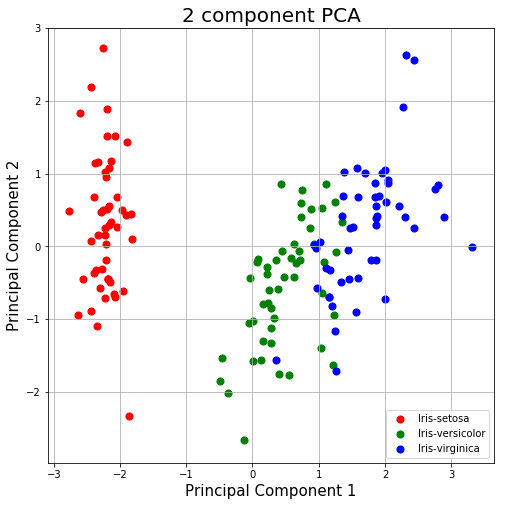

In [49]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [53]:
print(pca.explained_variance_ratio_ * 100, ' %')

[72.77045209 23.03052327]  %


In [54]:
#PCA to Speed-up Machine Learning Algorithms
#One of the most important applications of PCA is for speeding up machine learning algorithms. Using the IRIS dataset would be impractical here as the dataset only has 150 rows and only 4 feature columns. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.
#Download and Load the Data


In [55]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/Users/pascal/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/pascal/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [63]:
print(np.shape(mnist.data))
type(mnist)

(70000, 784)


sklearn.utils.Bunch

In [58]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [64]:
# follow along in https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60